<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_%F0%9F%90%8D_Analisis_Centrality_dengan_Python_(NetworkX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Studi kasus ini bertujuan untuk mengukur dan membandingkan empat metrik *centrality* utama pada jaringan yang relatif padat (*dense*).

## Cell 1: Persiapan dan Pembuatan Jaringan Dummy

Kita akan menggunakan **NetworkX** untuk membangun *random graph* (Grafik Acak) yang mensimulasikan jaringan komunikasi antar 50 pengguna.

In [1]:
# Import library yang dibutuhkan
import networkx as nx
import random
import matplotlib.pyplot as plt

# Tetapkan jumlah node
N_NODES = 50
# Tetapkan tingkat kepadatan (probability edge creation)
# Kita gunakan 0.15 untuk mendapatkan jaringan yang cukup kompleks
P_EDGE = 0.15

# 1. Membuat Jaringan Dummy: Random Graph (Erdos-Renyi model)
# Anggap 50 node ini adalah 50 karyawan dalam sebuah perusahaan
G = nx.fast_gnp_random_graph(N_NODES, P_EDGE, seed=42)

print(f"Jaringan berhasil dibuat:")
print(f"- Jumlah Node (Karyawan): {G.number_of_nodes()}")
print(f"- Jumlah Edge (Koneksi Komunikasi): {G.number_of_edges()}")

# Pastikan grafiknya terhubung (saling bisa menjangkau)
if not nx.is_connected(G):
    print("\n[PERINGATAN] Grafik tidak sepenuhnya terhubung. Hanya akan menganalisis komponen terbesar.")
    # Ambil komponen terbesar saja untuk analisis centrality
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(f"  - Node yang dianalisis: {G.number_of_nodes()}")
else:
    print("\n[INFO] Grafik terhubung sempurna.")

Jaringan berhasil dibuat:
- Jumlah Node (Karyawan): 50
- Jumlah Edge (Koneksi Komunikasi): 189

[INFO] Grafik terhubung sempurna.


## Cell 2: Visualisasi Awal Jaringan

Memvisualisasikan jaringan membantu kita mendapatkan intuisi visual tentang topologinya. Kita gunakan *layout* ForceAtlas2 yang disimulasikan oleh `spring_layout` NetworkX.

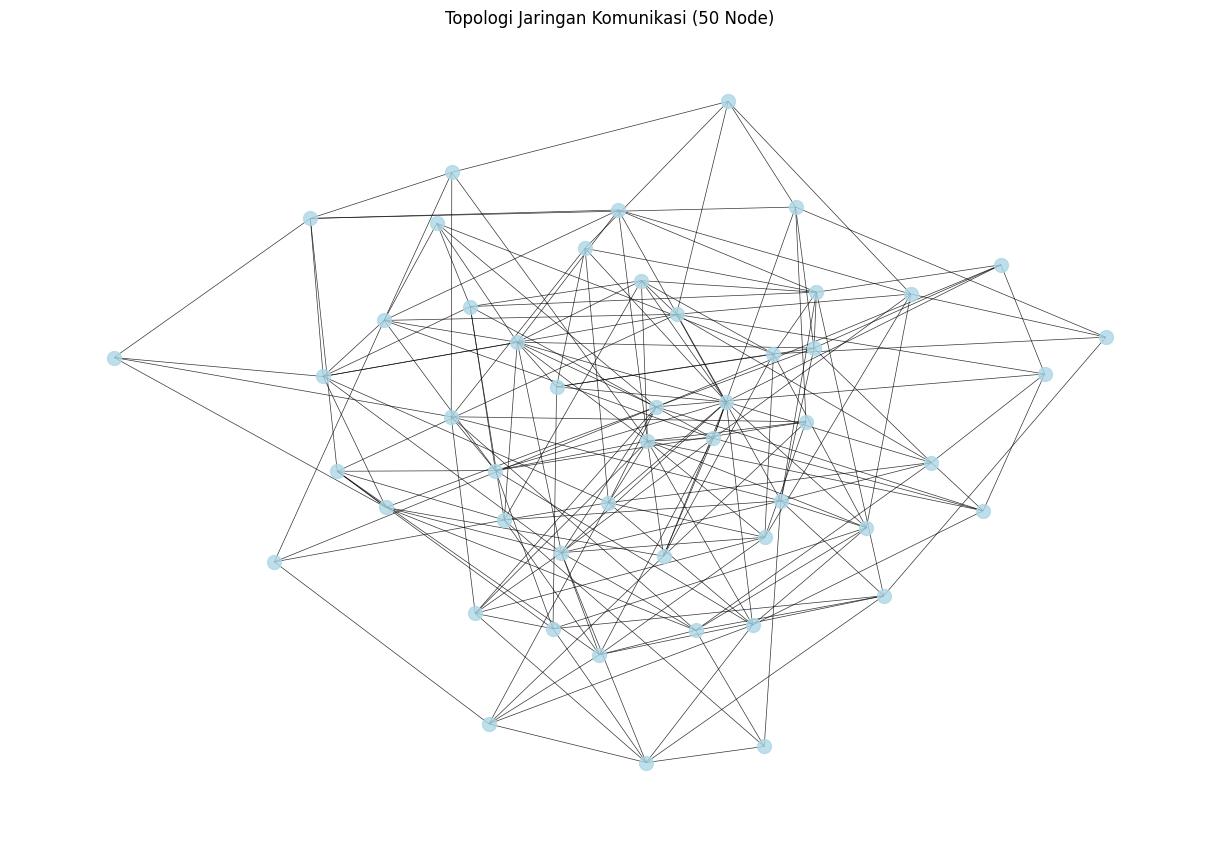

Visualisasi awal menunjukkan adanya beberapa cluster dan node yang terlihat sentral.


In [3]:
# Tentukan layout visualisasi
pos = nx.spring_layout(G, seed=42, k=0.1)

plt.figure(figsize=(12, 8))

# Menggunakan fungsi nx.draw() untuk menggantikan nx.draw_nodes() dan nx.draw_edges()
nx.draw(G, pos,
        node_size=100,
        node_color='lightblue',
        with_labels=False, # Tidak menampilkan label node (angka)
        width=0.5,         # Ketebalan edge
        alpha=0.8)         # Transparansi edge

plt.title(f"Topologi Jaringan Komunikasi ({G.number_of_nodes()} Node)")
plt.axis('off')
plt.show()

print("Visualisasi awal menunjukkan adanya beberapa cluster dan node yang terlihat sentral.")

## Cell 3: Implementasi Centrality Measures (The Core Calculation)

Kita hitung empat metrik *centrality* utama menggunakan fungsi *built-in* NetworkX.


In [4]:
# Hitung semua metrik centrality
degree_c = nx.degree_centrality(G)
betweenness_c = nx.betweenness_centrality(G)
closeness_c = nx.closeness_centrality(G)
# Eigenvector centrality membutuhkan semua nilai positif
eigenvector_c = nx.eigenvector_centrality(G, max_iter=1000)

# Konversi hasil ke DataFrame untuk memudahkan analisis dan perbandingan
import pandas as pd

# Buat kamus (dictionary) dari semua hasil
data = {
    'Node': list(G.nodes()),
    'Degree': [degree_c[node] for node in G.nodes()],
    'Betweenness': [betweenness_c[node] for node in G.nodes()],
    'Closeness': [closeness_c[node] for node in G.nodes()],
    'Eigenvector': [eigenvector_c[node] for node in G.nodes()]
}

df_centrality = pd.DataFrame(data).set_index('Node')

print("Perhitungan centrality selesai. Berikut adalah 5 node teratas berdasarkan Degree Centrality:")
print(df_centrality.sort_values(by='Degree', ascending=False).head())

Perhitungan centrality selesai. Berikut adalah 5 node teratas berdasarkan Degree Centrality:
        Degree  Betweenness  Closeness  Eigenvector
Node                                               
10    0.285714     0.058226   0.544444     0.273488
34    0.285714     0.061069   0.544444     0.261487
23    0.244898     0.043149   0.538462     0.245179
4     0.244898     0.049808   0.550562     0.234604
1     0.204082     0.040669   0.532609     0.194697


## Cell 4: Analisis dan Perbandingan Centrality

Mari kita lihat node mana yang paling penting untuk setiap kategori, dan apakah hasilnya konsisten\!

In [5]:
print("--- Aktor Paling Berpengaruh Berdasarkan Jenis Centrality ---")

# Fungsi untuk mendapatkan node dengan nilai tertinggi
def get_top_node(df, metric):
    top_node = df[metric].idxmax()
    top_value = df[metric].max()
    return top_node, top_value

# 1. Degree Centrality (Si Populer)
node_degree, val_degree = get_top_node(df_centrality, 'Degree')
print(f"\n1. Aktor Paling Populer (Degree): Node {node_degree} (Nilai: {val_degree:.4f})")
print("   Interpretasi: Karyawan ini memiliki koneksi komunikasi langsung terbanyak. Penyebar pesan yang baik.")

# 2. Betweenness Centrality (Si Jembatan)
node_betweenness, val_betweenness = get_top_node(df_centrality, 'Betweenness')
print(f"\n2. Aktor Paling Strategis (Betweenness): Node {node_betweenness} (Nilai: {val_betweenness:.4f})")
print("   Interpretasi: Karyawan ini paling sering menjadi 'jembatan' antar kelompok. Bottleneck dan pengontrol aliran informasi.")

# 3. Closeness Centrality (Si Cepat)
node_closeness, val_closeness = get_top_node(df_centrality, 'Closeness')
print(f"\n3. Aktor Paling Efisien (Closeness): Node {node_closeness} (Nilai: {val_closeness:.4f})")
print("   Interpretasi: Karyawan ini tercepat untuk menjangkau seluruh karyawan lain secara rata-rata.")

# 4. Eigenvector Centrality (Si Terhubung dengan Para Penting)
node_eigen, val_eigen = get_top_node(df_centrality, 'Eigenvector')
print(f"\n4. Aktor Paling Berpengaruh (Eigenvector): Node {node_eigen} (Nilai: {val_eigen:.4f})")
print("   Interpretasi: Karyawan ini terhubung dengan karyawan lain yang juga penting (memiliki Eigenvector tinggi).")

# Perbandingan Kritis
print("\n--- Kesimpulan Perbandingan ---")
if node_degree == node_betweenness == node_closeness:
    print("Ketiga metrik sepakat: Node ini adalah 'Superstar' jaringan!")
else:
    print(f"Hasil menunjukkan perbedaan kunci:")
    print(f"  - Node {node_degree} populer, tetapi Node {node_betweenness} yang paling mengontrol.")
    print(f"  - Node {node_closeness} mungkin bukan yang paling populer, tetapi paling cepat.")

--- Aktor Paling Berpengaruh Berdasarkan Jenis Centrality ---

1. Aktor Paling Populer (Degree): Node 10 (Nilai: 0.2857)
   Interpretasi: Karyawan ini memiliki koneksi komunikasi langsung terbanyak. Penyebar pesan yang baik.

2. Aktor Paling Strategis (Betweenness): Node 34 (Nilai: 0.0611)
   Interpretasi: Karyawan ini paling sering menjadi 'jembatan' antar kelompok. Bottleneck dan pengontrol aliran informasi.

3. Aktor Paling Efisien (Closeness): Node 4 (Nilai: 0.5506)
   Interpretasi: Karyawan ini tercepat untuk menjangkau seluruh karyawan lain secara rata-rata.

4. Aktor Paling Berpengaruh (Eigenvector): Node 10 (Nilai: 0.2735)
   Interpretasi: Karyawan ini terhubung dengan karyawan lain yang juga penting (memiliki Eigenvector tinggi).

--- Kesimpulan Perbandingan ---
Hasil menunjukkan perbedaan kunci:
  - Node 10 populer, tetapi Node 34 yang paling mengontrol.
  - Node 4 mungkin bukan yang paling populer, tetapi paling cepat.


## Cell 5: Visualisasi Berdasarkan Betweenness Centrality

Mari kita visualisasikan jaringan lagi, kali ini ukuran *node* akan merepresentasikan nilai **Betweenness Centrality** untuk menonjolkan "Si Jembatan Strategis".

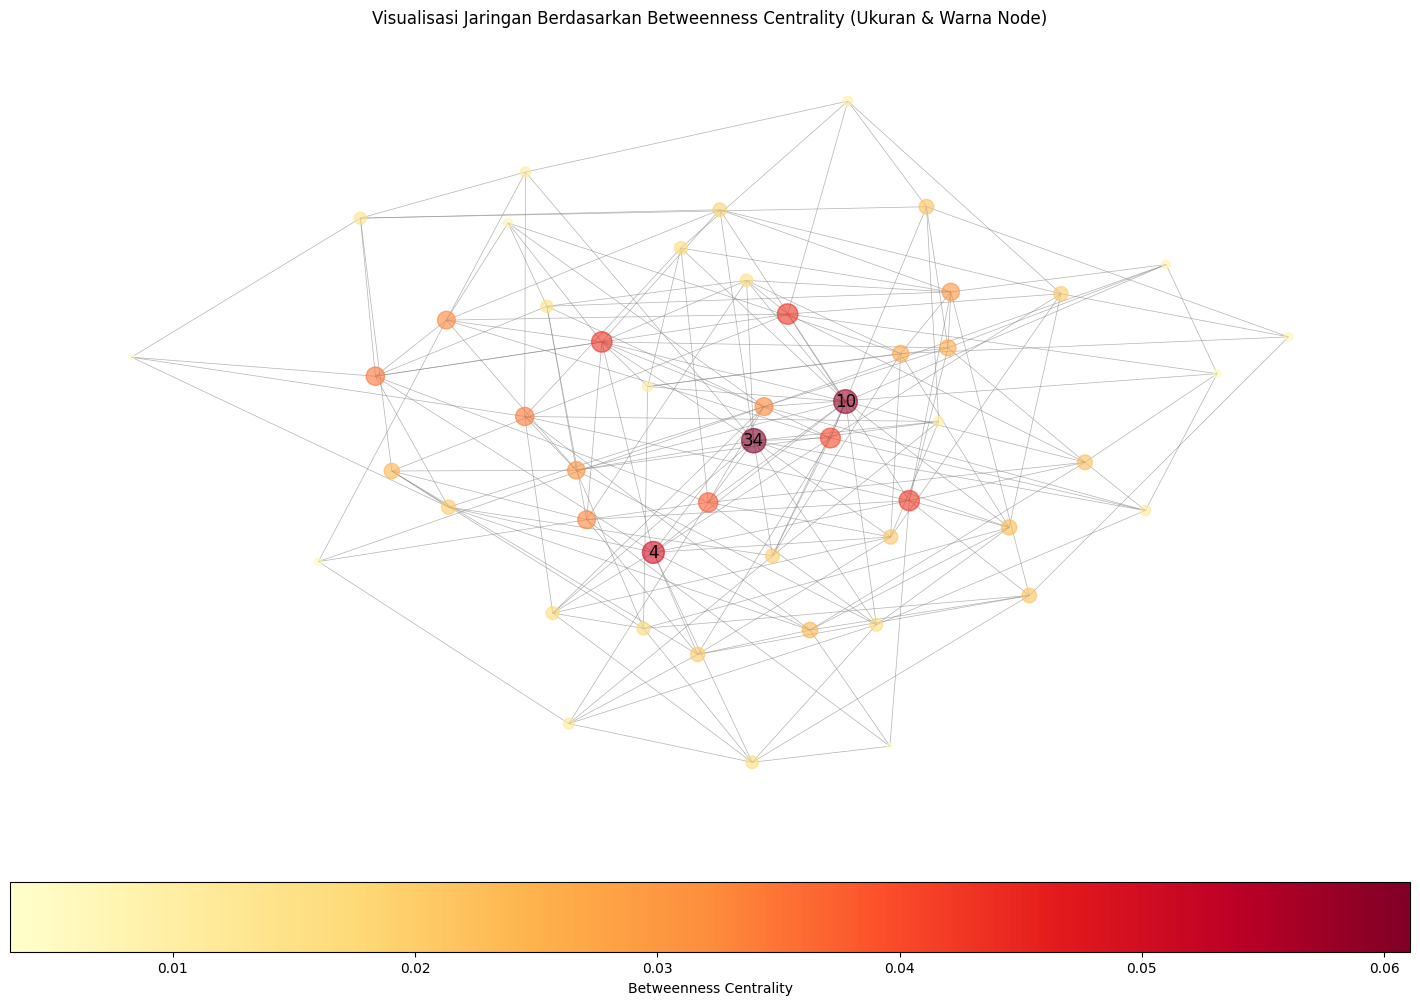

In [8]:
# Cell 5: Visualisasi Berdasarkan Betweenness Centrality (Revisi Final)

# Nilai betweenness diubah ke ukuran node
node_sizes = [v * 5000 for v in betweenness_c.values()]
node_colors = list(betweenness_c.values()) # Nilai yang akan dijadikan warna

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42, k=0.1)

# 1. Menggambar Jaringan menggunakan nx.draw()
# Kita tetap gunakan nx.draw() untuk menggambar node dan edge
nx.draw(G, pos,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.YlOrRd,
        with_labels=False,
        width=0.5,
        edge_color='gray',
        alpha=0.6)

# --- BAGIAN KRITIS UNTUK COLORBAR ---
# 2. Buat Objek Mappable Palsu menggunakan plt.scatter()
# Kita panggil plt.scatter HANYA untuk mendapatkan objek Mappable (sm)
# Kita atur alpha=0 agar titik-titik ini tidak terlihat di plot utama
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array(node_colors) # Penting: Berikan array warna Anda ke mappable

# 3. Tambahkan Color Bar
# Sekarang plt.colorbar memiliki objek 'mappable' yang valid (sm)
plt.colorbar(sm, label='Betweenness Centrality', ax=plt.gca(), orientation='horizontal', pad=0.05)


# 4. Tambahkan Label untuk 3 node teratas (Opsional)
top_3_betweenness = df_centrality.sort_values(by='Betweenness', ascending=False).head(3).index.tolist()
top_3_labels = {node: f'{node}' for node in top_3_betweenness}
nx.draw_networkx_labels(G, pos, labels=top_3_labels, font_size=12, font_color='black')


plt.title("Visualisasi Jaringan Berdasarkan Betweenness Centrality (Ukuran & Warna Node)")
plt.axis('off')
plt.show()